# HEALTHCARE PROJECT USING AIML APPLICATION

<b>Context</b> - A medical research university is undergoing a deep research on patients with certain medical conditions. The university requires a solution using AIML which can fetch, process and leverage the data to predict the condition of the patient depending on the received test results.

<b>Objective</b> - The aim of this project is to generate a predictive model by leveraging the data provided to us by the medical research university team.

<b>Data Description</b> - Due to confidentiality the patient's details and the conditions are masked by the client for data privacy issues. The data consists of biomechanical features of the patients according to their current condition. Each patient is represented in the dataset by 6 biomechanical attributes derived from the shape and orientation of the condition to their body part.
There are 3 .csv files provided to us, and each file contains data according to the following 3 types of patients - 

1. Normal case (Normal.csv)
2. Type-H condition case (Type_H.csv)
3. Type-S condition case (Type_S.csv)


Since, we have to build the model based on the data of all the three files, initiating the model building by merging their dataset into one dataframe.

### Importing the required libraries and the dataset

In [2]:
# importing all the required libraries, all the libraries that will be used in this notebookabs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='whitegrid', palette='tab10')
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve, recall_score
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [6]:
# importing the available data files, reading the dimensions and then merging into 1 main dataframe for our use.

csv_files_list = ["Normal.csv", "Type_H.csv", "Type_S.csv"]  # list of the .csv files we have
df_list = []

for file in csv_files_list:   # reading the shape of each file
    df = pd.read_csv("D:/art_intel/03_supervised_learning/Project/healthcare_project_data/{}".format(file)) 
    print("Shape of '{0}' dataframe: {1}".format(file, df.shape)) 
    df_list.append(df)
        
main_df = pd.concat(df_list)    # merging all the dataframes into one
print("\nshape of the final dataframe after merging the above {0} dataframes: {1}".format(len(df_list), main_df.shape))

Shape of 'Normal.csv' dataframe: (100, 7)
Shape of 'Type_H.csv' dataframe: (60, 7)
Shape of 'Type_S.csv' dataframe: (150, 7)

shape of the final dataframe after merging the above 3 dataframes: (310, 7)


### Data exploration and cleaning

In [3]:
main_df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [5]:
main_df['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

Basic summary of the overall dataset -
1. After merging datasets of all the conditions, we have **310 x 7** dimension.
2. Target variable - **Class**, object dtype which has basically 3 types of classes/conditions (Normal, Type-H, and Type-C)
3. All the predictor variables have numerical datatype (float64).
4. No missing/null values in the dataset.
5. As there are 3 classes in our target variable, we can predict either:
    - **Normal vs Abnormal conditions** (Type-H + Type-S), where our target will be binomial.
    - **Normal vs Type-H vs Type-S**, multinomial target variable, where we will predict the exact condition

Considering our problem statement, in which we have to predict the condition of the patient based on the test parameters represented as the predictor variables, this is a **multinomial problem**.

### Data analysis & visualization

In [10]:
# Fixing the labelling of the Class variable
main_df['Class'] = main_df['Class'].replace("Nrmal", "Normal").replace("type_h", "Type_H").replace("tp_s", "Type_S")
main_df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

#### 1. Univariate Analysis

#### target variable plot: Class

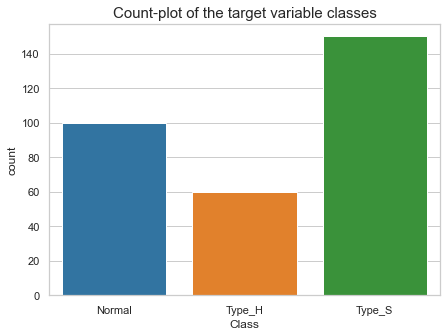

In [7]:
plt.figure(figsize = (7,5))
sns.countplot(main_df['Class'])
plt.title("Count-plot of the target variable classes", fontsize=15)
plt.show()

#### Plotting the predictor variables

Distribution plots of numerical variables -





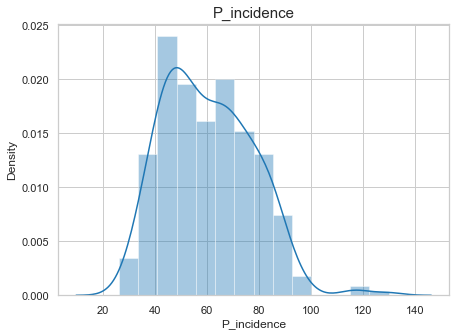

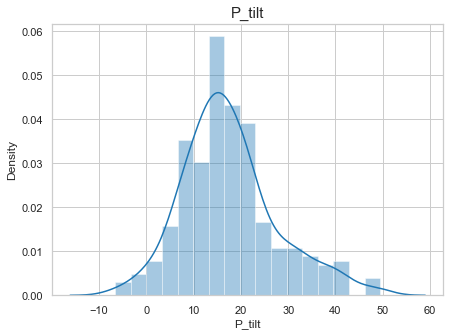

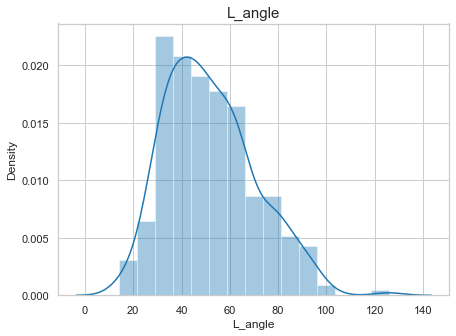

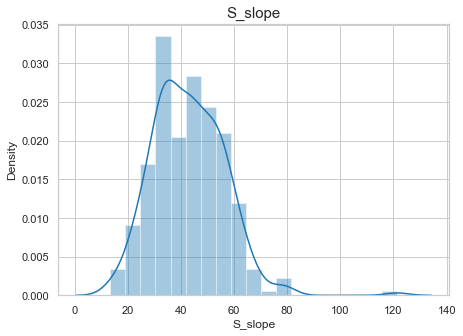

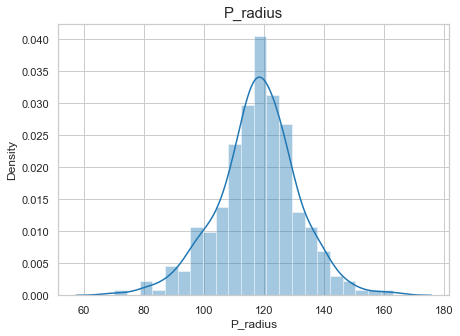

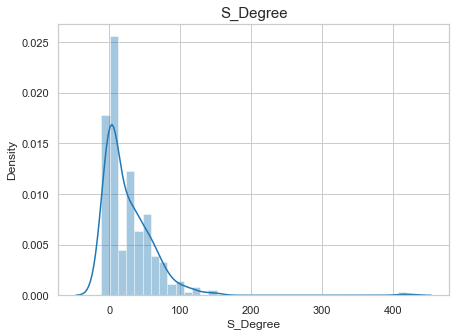

In [8]:
print("Distribution plots of numerical variables -")
for col in main_df.columns:
    if col == "Class":
        continue
    else:
        plt.figure(figsize = (7,5))
        sns.distplot(main_df[col])
        plt.title("{}".format(col), fontsize=15)
        print("\n\n")
        plt.show()

Box-plots of numerical variables -





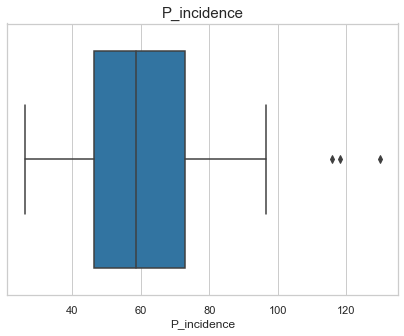

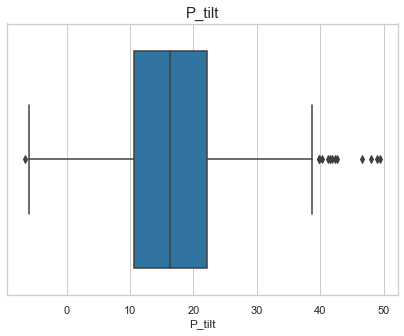

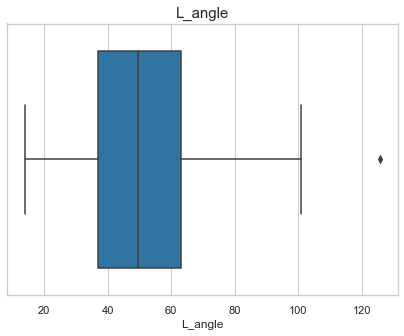

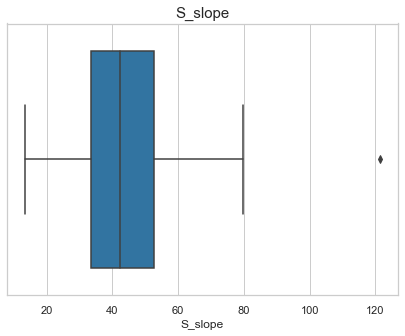

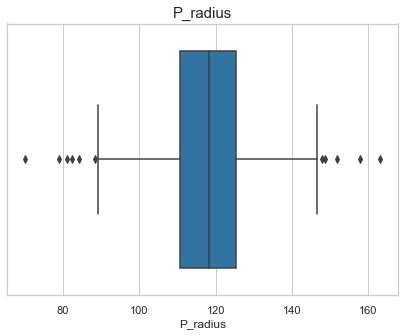

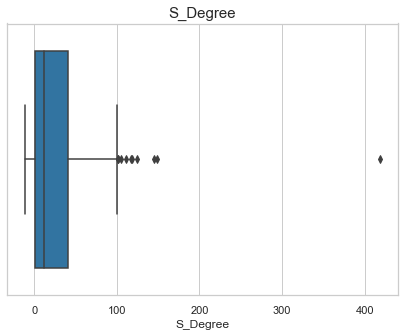

In [9]:
print("Box-plots of numerical variables -")
for col in main_df.columns:
    if col == "Class":
        continue
    else:
        plt.figure(figsize = (7,5))
        sns.boxplot(main_df[col])
        plt.title("{}".format(col), fontsize=15)
        print("\n\n")
        plt.show()

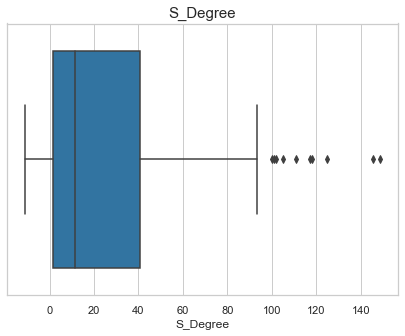

In [10]:
# visualising S_Degree variable after filtering records less than 400 degree value

plt.figure(figsize = (7,5))
sns.boxplot(main_df[main_df['S_Degree']<400]['S_Degree'])
plt.title("S_Degree", fontsize=15)
plt.show()

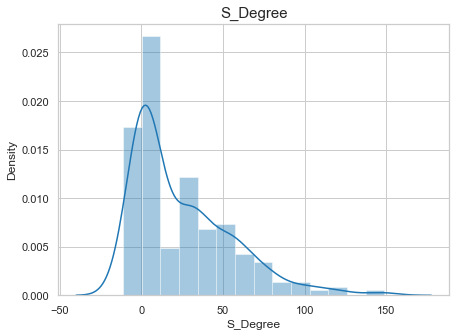

In [11]:
plt.figure(figsize = (7,5))
sns.distplot(main_df[main_df['S_Degree']<400]['S_Degree'])
plt.title("S_Degree", fontsize=15)
plt.show()

In [7]:
# len(main_df[main_df['S_Degree']>400])

In [8]:
# only 1 record where S_Degree value is >400, so removing the outlier
# main_df = main_df[main_df['S_Degree']<400]
# main_df.shape

##### Points after doing the univariate analysis -
1. Since all the independent variables are numerical so observed their distribution 
2. All the predictor variables are normally distributed, except **S_Degree** variable, which has an extreme outlier.
3. Observed the boxplot of all the numerical variables to check for any outliers.
4. Only S_Degree variable has an extreme outlier.
5. In the target variable, **Type_S** is in the majority count, followed by  **Normal** class, and least is the **Type_H** class.

#### 2. Bivariate analysis

Bivariate plots -





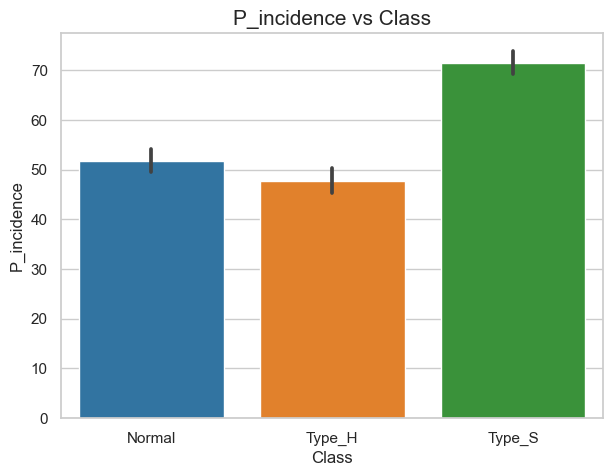

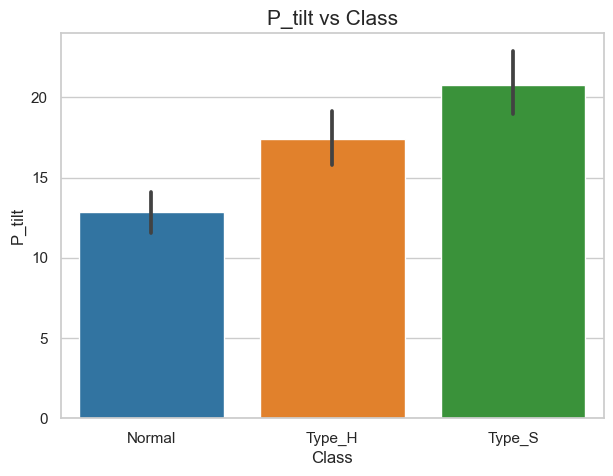

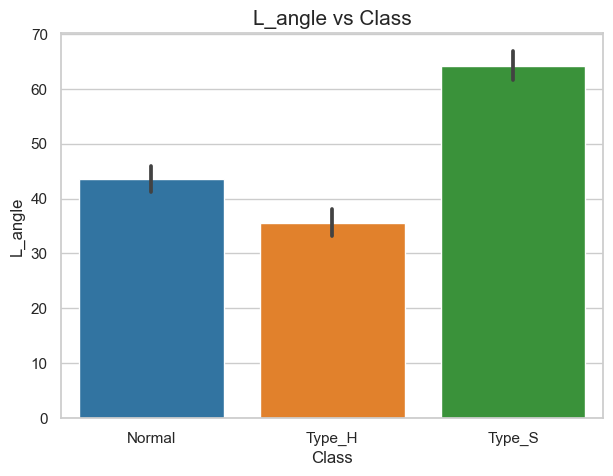

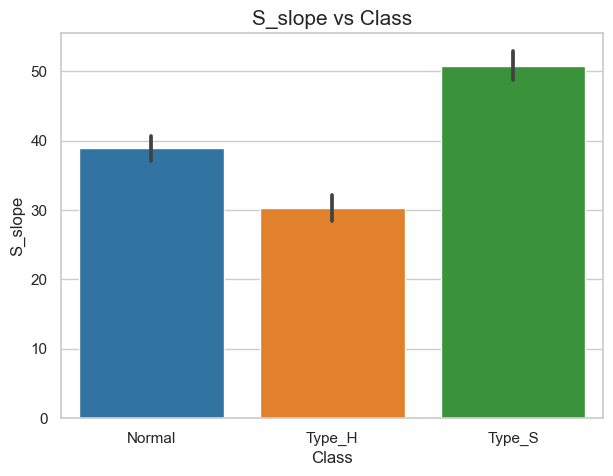

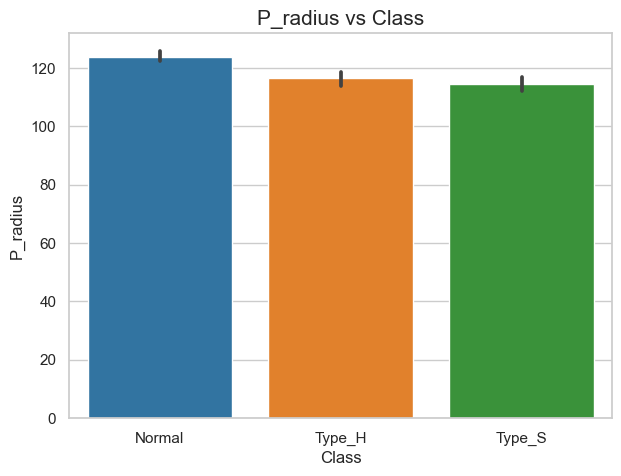

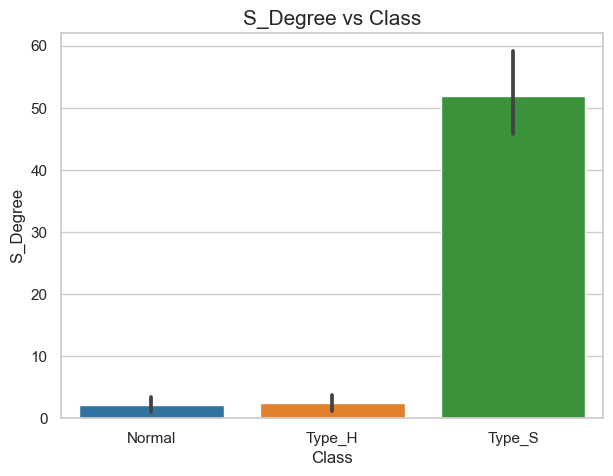

In [12]:
print("Bivariate plots -")
for col in main_df.columns:
    if col == "Class":
        continue
    else:
        plt.figure(figsize = (7,5))
        sns.barplot(data = main_df, x = 'Class', y = col)
        plt.title("{} vs Class".format(col), fontsize=15)
        print("\n\n")
        plt.show()

##### Insights after bivariate analysis -
1. **P_tilt** seems to have some effect on the target - 
    - the Normal classes are in the range of 10-15
    - considering the count difference between the Normal and Type_H class, the Normal class has lesser count than Type_H
    - Type-H is above 15 range whereas Type_S is even higher, >20<br>
<br></br>
2. **S_Degree** variable is showing some relation, as both the Normal and Type_H classes are very much lower in count than the Type_S class -
    - Type_H and Normal classes, both are below **5 degree** range.
    - Whereas Type_S is ranging slightly above **50 degree** range.
    - this variable can be an indicator of the presence of Type_S condition in a patient.

#### 3. Multivariate analysis

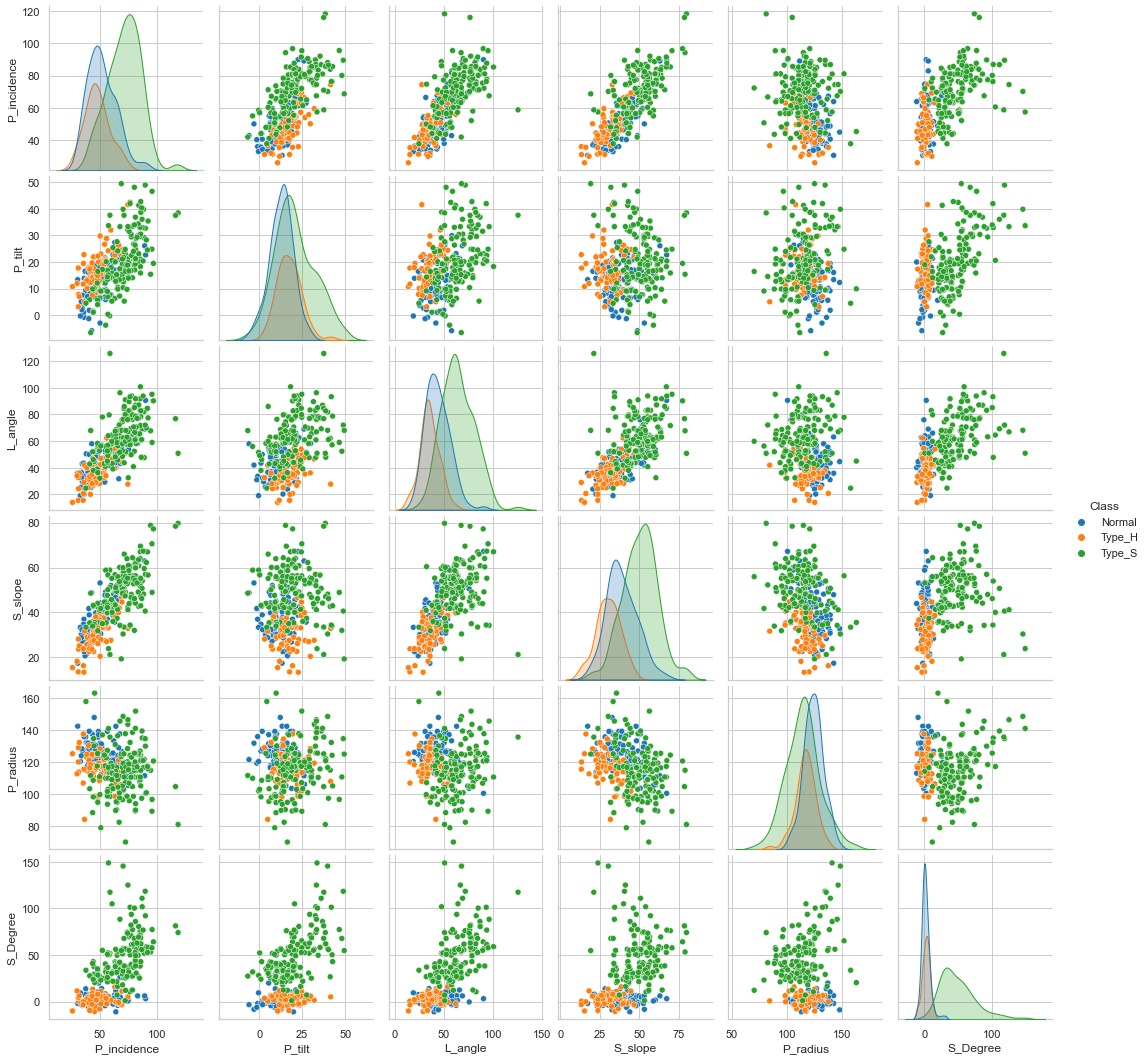

In [15]:
sns.pairplot(main_df, hue='Class')
plt.show()

##### Insights from the above plot -
1. The correlation plots above are showing overlapping between classes of the target variable.
2. Chances of missclassification are high since the groups are tightly bound to each other and overlapped
3. **S_Degree** variable is showing clear separation of Type_S condition from Normal and Type_H condition. 

----